In this notebook, I create the results against which slow tests will be compared against

___

In [1]:
import numpy as np
import torch

from diffusers import ControlNetXSModel, StableDiffusionXLControlNetXSPipeline
from diffusers.utils.testing_utils import enable_full_determinism, load_image

np.set_printoptions(linewidth=140,precision=4)
torch.set_printoptions(linewidth=140,precision=4)

enable_full_determinism()

## SDXL canny

In [2]:
controlnet = ControlNetXSModel.from_pretrained("UmerHA/ConrolNetXS-SDXL-canny")

pipe = StableDiffusionXLControlNetXSPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", controlnet=controlnet
)
pipe.enable_sequential_cpu_offload()
pipe.set_progress_bar_config(disable=None)

generator = torch.Generator(device="cpu").manual_seed(0)
prompt = "bird"
image = load_image("https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/bird_canny.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

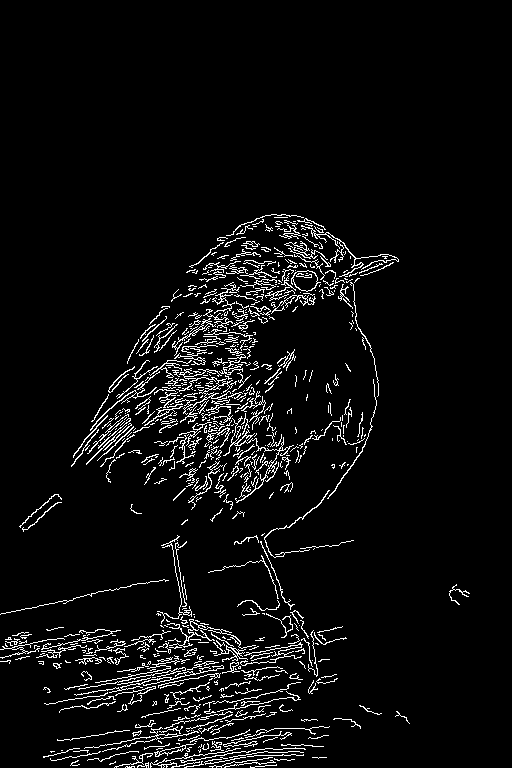

In [3]:
image

In [4]:
images = pipe(prompt, image=image, generator=generator, output_type="np", num_inference_steps=3).images

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
assert images[0].shape == (768, 512, 3)

In [6]:
original_image = images[0, -3:, -3:, -1].flatten()

In [7]:
original_image

array([0.4359, 0.4335, 0.4609, 0.4515, 0.4669, 0.4494, 0.452 , 0.4493, 0.4382], dtype=float32)

In [8]:
expected_image = np.array([0.4359, 0.4335, 0.4609, 0.4515, 0.4669, 0.4494, 0.452 , 0.4493, 0.4382])

In [9]:
assert np.allclose(original_image, expected_image, atol=1e-04)

## SDXL depth

In [10]:
controlnet = ControlNetXSModel.from_pretrained("UmerHA/ConrolNetXS-SDXL-depth")

pipe = StableDiffusionXLControlNetXSPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", controlnet=controlnet
)
pipe.enable_sequential_cpu_offload()
pipe.set_progress_bar_config(disable=None)

generator = torch.Generator(device="cpu").manual_seed(0)
prompt = "Stormtrooper's lecture"
image = load_image(
    "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/stormtrooper_depth.png"
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

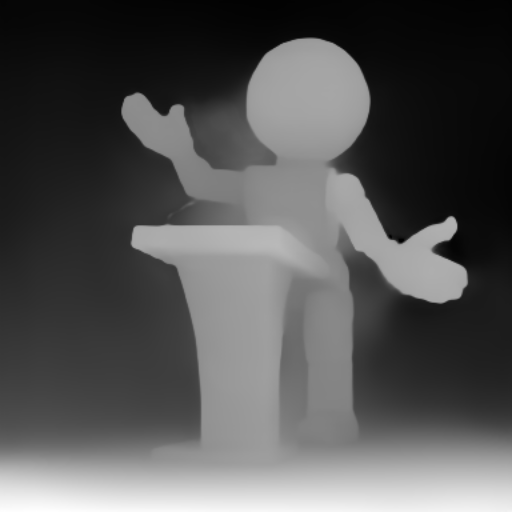

In [11]:
image

In [12]:
images = pipe(prompt, image=image, generator=generator, output_type="np", num_inference_steps=3).images

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
assert images[0].shape == (512, 512, 3)

In [16]:
original_image = images[0, -3:, -3:, -1].flatten()

In [17]:
original_image

array([0.4411, 0.3617, 0.2654, 0.266 , 0.3449, 0.3898, 0.3745, 0.353 , 0.326 ], dtype=float32)

In [18]:
expected_image = np.array([0.4411, 0.3617, 0.2654, 0.266 , 0.3449, 0.3898, 0.3745, 0.353 , 0.326])

In [19]:
assert np.allclose(original_image, expected_image, atol=1e-04)

## SD2.1 canny

In [1]:
import numpy as np
import torch

from diffusers import ControlNetXSModel, StableDiffusionControlNetXSPipeline
from diffusers.utils.testing_utils import enable_full_determinism, load_image

np.set_printoptions(linewidth=140,precision=4)
torch.set_printoptions(linewidth=140,precision=4)

enable_full_determinism()

In [3]:
controlnet = ControlNetXSModel.from_pretrained("UmerHA/ConrolNetXS-SD2.1-canny")

pipe = StableDiffusionControlNetXSPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", safety_checker=None, controlnet=controlnet
)
pipe.enable_model_cpu_offload()
pipe.set_progress_bar_config(disable=None)

generator = torch.Generator(device="cpu").manual_seed(0)
prompt = "bird"
image = load_image(
    "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/bird_canny.png"
)

output = pipe(prompt, image, generator=generator, output_type="np", num_inference_steps=3)

image = output.images[0]

config.json:   0%|          | 0.00/3.12k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/56.8M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
assert image.shape == (768, 512, 3)

In [11]:
original_image = image[-3:, -3:, -1].flatten()

expected_image = [0.1274, 0.1401, 0.147 , 0.1185, 0.1555, 0.1492, 0.1565, 0.1474, 0.1701]

assert np.allclose(original_image, expected_image, atol=1e-04)

## SD2.1 depth

In [12]:
controlnet = ControlNetXSModel.from_pretrained("UmerHA/ConrolNetXS-SD2.1-depth")

pipe = StableDiffusionControlNetXSPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", safety_checker=None, controlnet=controlnet
)
pipe.enable_model_cpu_offload()
pipe.set_progress_bar_config(disable=None)

generator = torch.Generator(device="cpu").manual_seed(0)
prompt = "Stormtrooper's lecture"
image = load_image(
    "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/stormtrooper_depth.png"
)

output = pipe(prompt, image, generator=generator, output_type="np", num_inference_steps=3)

image = output.images[0]

config.json:   0%|          | 0.00/3.12k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/56.8M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
assert image.shape == (512, 512, 3)

In [21]:
original_image

array([0.1098, 0.1025, 0.1211, 0.1129, 0.1165, 0.1262, 0.1185, 0.1261, 0.1703], dtype=float32)

In [22]:
original_image = image[-3:, -3:, -1].flatten()
expected_image = np.array([0.1098, 0.1025, 0.1211, 0.1129, 0.1165, 0.1262, 0.1185, 0.1261, 0.1703])
assert np.allclose(original_image, expected_image, atol=1e-04)